<a href="https://colab.research.google.com/github/Basy-Duke/Basy-Duke/blob/main/BASY_LINEAR_REGRESSION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A LINEAR REGRESSION MODEL TO PREDICT HOUSE PRICES IN LAGOS

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # For saving model

In [53]:
df = pd.read_csv('/content/drive/MyDrive/crib (1).csv')

# Initial Data Inspection

In [54]:
df.head()

,Property Ref,Added On,Last Updated,Market Status,Type,Bedrooms,Bathrooms,Toilets,Parking Spaces,Furnishing,Price,District,State,Servicing,Service Charge,Total Area,Covered Area
0,2619053,13 Dec 2024,27 Mar 2025,Available,House,3.0,3.0,4.0,1.0,Furnished,110000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
1,2674076,21 Jan 2025,15 Apr 2025,Available,Terraced Duplex,4.0,4.0,5.0,3.0,NaN,530000000.0,Victoria Island (VI),Lagos,Serviced,NaN,NaN,NaN
2,2820608,15 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,5.0,7.0,6.0,4.0,NaN,850000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
3,2820575,15 Apr 2025,15 Apr 2025,Available,Detached Duplex,5.0,5.0,6.0,5.0,NaN,450000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
4,2790291,27 Mar 2025,15 Apr 2025,Available,Detached Duplex,4.0,4.0,5.0,3.0,NaN,250000000.0,Lekki,Lagos,Serviced,NaN,NaN,NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10157 entries, 0 to 10156
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Property Ref    10157 non-null  int64  
 1   Added On        10157 non-null  object 
 2   Last Updated    10157 non-null  object 
 3   Market Status   10157 non-null  object 
 4   Type            10157 non-null  object 
 5   Bedrooms        10061 non-null  float64
 6   Bathrooms       9089 non-null   float64
 7   Toilets         9297 non-null   float64
 8   Parking Spaces  5705 non-null   float64
 9   Furnishing      756 non-null    object 
 10  Price           10157 non-null  float64
 11  District        10157 non-null  object 
 12  State           10157 non-null  object 
 13  Servicing       744 non-null    object 
 14  Service Charge  119 non-null    object 
 15  Total Area      2086 non-null   object 
 16  Covered Area    1636 non-null   object 
dtypes: float64(5), int64(1), object

In [56]:
df.describe()

,Property Ref,Bedrooms,Bathrooms,Toilets,Parking Spaces,Price
count,1.015700e+04,10061.000000,9089.000000,9297.000000,5705.000000,1.015700e+04
mean,2.762072e+06,4.372826,4.487182,5.325696,7.133918,1.646746e+09
std,1.534018e+05,2.166722,2.041513,3.006802,61.893916,5.976922e+10
min,1.703425e+06,1.000000,1.000000,1.000000,1.000000,1.700000e+05
25%,2.780553e+06,4.000000,4.000000,5.000000,3.000000,1.500000e+08
50%,2.819974e+06,4.000000,4.000000,5.000000,4.000000,2.700000e+08
75%,2.825776e+06,5.000000,5.000000,6.000000,5.000000,4.500000e+08
max,2.853837e+06,111.000000,51.000000,112.000000,1600.000000,5.606614e+12


In [57]:
df.isnull().sum()

,0
Property Ref,0
Added On,0
Last Updated,0
Market Status,0
Type,0
Bedrooms,96
Bathrooms,1068
Toilets,860
Parking Spaces,4452
Furnishing,9401


#  Handle Missing Data (if any)

In [58]:
df.dropna(inplace=True)

In [59]:
df.shape

(1, 17)

#  Encode Categorical Variables

In [60]:
df = pd.get_dummies(df, drop_first=True)

#  Correlation Matrix (EDA)

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


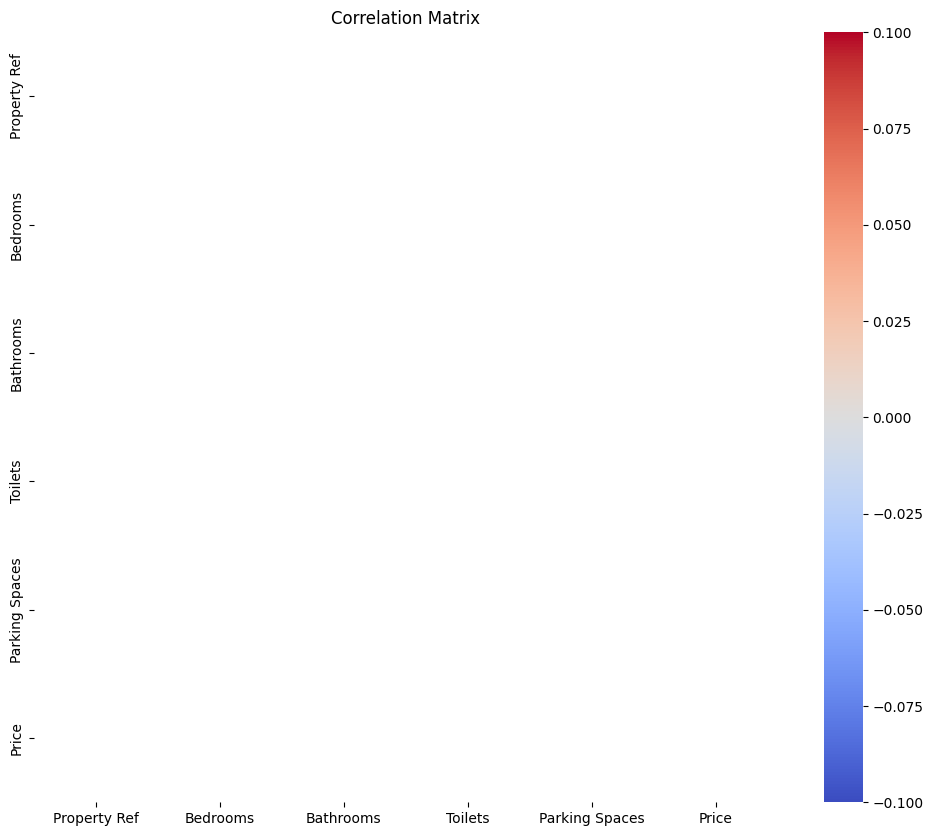

In [61]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#  Feature and Target Selection
#  Predicting Price

In [62]:
X = df.drop('Price', axis=1)  # Features
y = df['Price']               # Target

#  Split Dataset into Training and Test Sets


In [63]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Initialize and Train Linear Regression Model
